# SQL ข้อมูลฝุ่นละอองและอุณหภูมิจากเซ็นเซอร์

## วิษณุ   ค้าเครื่องเรือน 6030822121

## ER diagram

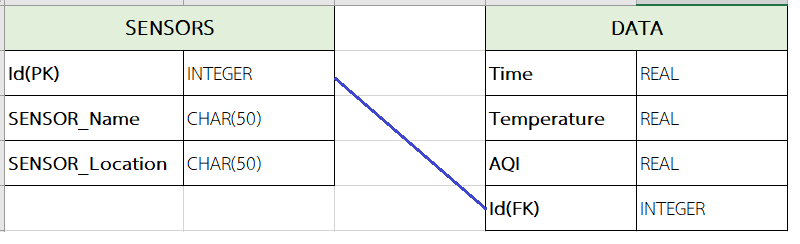

In [1]:
# ให้ทำการติดตั้ง conda install requests และ conda install requests pillow
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://raw.githubusercontent.com/WITSANUKHA/SQL/master/ER.png')
img = Image.open(BytesIO(response.content))
img

## สร้างตาราง

In [2]:
import sqlite3

t = sqlite3.connect('sqlaqid.db')
print("Opened database successfully");

t.execute('''
CREATE TABLE IF NOT EXISTS Sensors (
    Id INTEGER PRIMARY KEY NOT NULL,
    SENSOR_Name CHAR(50) NOT NULL,
    SENSOR_Location CHAR(50) NOT NULL
);''')

t.execute('''
CREATE TABLE Data (
    Time REAL NOT NULL,
    Temperature REAL NOT NULL,
    AQI REAL NOT NULL,
    Id INTEGER  NOT NULL
        CONSTRAINT fk_Sensors_Id REFERENCES Sensors(Id));''')

t.commit()

print("Table created successfully");

Opened database successfully
Table created successfully


## นำเข้าข้อมูล

In [3]:
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(1,'Aa','Engineering');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(2,'Bb','Architecture');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(3,'Cc','Arts');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(4,'Dd','Commerce and Accountancy');")
t.execute("INSERT INTO Sensors(Id,SENSOR_Name,SENSOR_Location) VALUES(5,'Ee','Dentistry');")

t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(8.5,35.0,50.4,1);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(8.5,35.2,51.0,2);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(8.5,34.9,48.2,3);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(8.5,35.6,49.5,4);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(8.5,35.1,50.1,5);")

t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(10.5,35.5,48.2,1);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(10.5,35.6,49.9,2);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(10.5,35.0,49.7,3);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(10.5,35.7,48.4,4);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(10.5,35.3,48.8,5);")

t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(12.5,35.7,51.2,1);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(12.5,35.9,51.9,2);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(12.5,35.5,50.5,3);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(12.5,35.4,50.1,4);")
t.execute("INSERT INTO Data(Time,Temperature,AQI,Id) VALUES(12.5,35.7,50.4,5);")

## ทดลอง query เลือกทุกแถวทุกคอลัมน์มาจากตาราง

In [4]:
for row in t.execute("SELECT * FROM SENSORS"):
  print(row)

(1, 'Aa', 'Engineering')
(2, 'Bb', 'Architecture')
(3, 'Cc', 'Arts')
(4, 'Dd', 'Commerce and Accountancy')
(5, 'Ee', 'Dentistry')


In [5]:
for row in t.execute("select * from Data"):
  print(row)

(8.5, 35.0, 50.4, 1)
(8.5, 35.2, 51.0, 2)
(8.5, 34.9, 48.2, 3)
(8.5, 35.6, 49.5, 4)
(8.5, 35.1, 50.1, 5)
(10.5, 35.5, 48.2, 1)
(10.5, 35.6, 49.9, 2)
(10.5, 35.0, 49.7, 3)
(10.5, 35.7, 48.4, 4)
(10.5, 35.3, 48.8, 5)
(12.5, 35.7, 51.2, 1)
(12.5, 35.9, 51.9, 2)
(12.5, 35.5, 50.5, 3)
(12.5, 35.4, 50.1, 4)
(12.5, 35.7, 50.4, 5)


## เลือกสองตารางมาเชื่อมกัน

In [6]:
t.execute("select d.Time,d.Temperature,d.AQI,d.Id,s.SENSOR_Name,s.SENSOR_Location from Data d, SENSORS s where d.Id=s.Id").fetchall()

[(8.5, 35.0, 50.4, 1, 'Aa', 'Engineering'),
 (8.5, 35.2, 51.0, 2, 'Bb', 'Architecture'),
 (8.5, 34.9, 48.2, 3, 'Cc', 'Arts'),
 (8.5, 35.6, 49.5, 4, 'Dd', 'Commerce and Accountancy'),
 (8.5, 35.1, 50.1, 5, 'Ee', 'Dentistry'),
 (10.5, 35.5, 48.2, 1, 'Aa', 'Engineering'),
 (10.5, 35.6, 49.9, 2, 'Bb', 'Architecture'),
 (10.5, 35.0, 49.7, 3, 'Cc', 'Arts'),
 (10.5, 35.7, 48.4, 4, 'Dd', 'Commerce and Accountancy'),
 (10.5, 35.3, 48.8, 5, 'Ee', 'Dentistry'),
 (12.5, 35.7, 51.2, 1, 'Aa', 'Engineering'),
 (12.5, 35.9, 51.9, 2, 'Bb', 'Architecture'),
 (12.5, 35.5, 50.5, 3, 'Cc', 'Arts'),
 (12.5, 35.4, 50.1, 4, 'Dd', 'Commerce and Accountancy'),
 (12.5, 35.7, 50.4, 5, 'Ee', 'Dentistry')]

## ทำการเชื่อมตารางเข้าด้วยกันและแสดงผลด้วย pandas

In [7]:
import pandas as pd

In [8]:
Data = pd.read_sql_query("SELECT * from Data",t)
Data

,Time,Temperature,AQI,Id
0,8.5,35.0,50.4,1
1,8.5,35.2,51.0,2
2,8.5,34.9,48.2,3
3,8.5,35.6,49.5,4
4,8.5,35.1,50.1,5
5,10.5,35.5,48.2,1
6,10.5,35.6,49.9,2
7,10.5,35.0,49.7,3
8,10.5,35.7,48.4,4
9,10.5,35.3,48.8,5


In [9]:
SENSORS = pd.read_sql_query("SELECT * from SENSORS",t)
SENSORS

,Id,SENSOR_Name,SENSOR_Location
0,1,Aa,Engineering
1,2,Bb,Architecture
2,3,Cc,Arts
3,4,Dd,Commerce and Accountancy
4,5,Ee,Dentistry


In [10]:
df = pd.merge(SENSORS,
              Data,
              on = 'Id')
df

,Id,SENSOR_Name,SENSOR_Location,Time,Temperature,AQI
0,1,Aa,Engineering,8.5,35.0,50.4
1,1,Aa,Engineering,10.5,35.5,48.2
2,1,Aa,Engineering,12.5,35.7,51.2
3,2,Bb,Architecture,8.5,35.2,51.0
4,2,Bb,Architecture,10.5,35.6,49.9
5,2,Bb,Architecture,12.5,35.9,51.9
6,3,Cc,Arts,8.5,34.9,48.2
7,3,Cc,Arts,10.5,35.0,49.7
8,3,Cc,Arts,12.5,35.5,50.5
9,4,Dd,Commerce and Accountancy,8.5,35.6,49.5
